<a href="https://colab.research.google.com/github/VijayanthyK/AILauchpadAssignments/blob/main/Assignment1_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns #import seaborn for enhanced visuals
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [111]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target variable as a column

# Display descriptive statistics
print(iris_df.describe())

# Display information about the dataset
print("\nDataset Information:")
print(iris_df.info())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

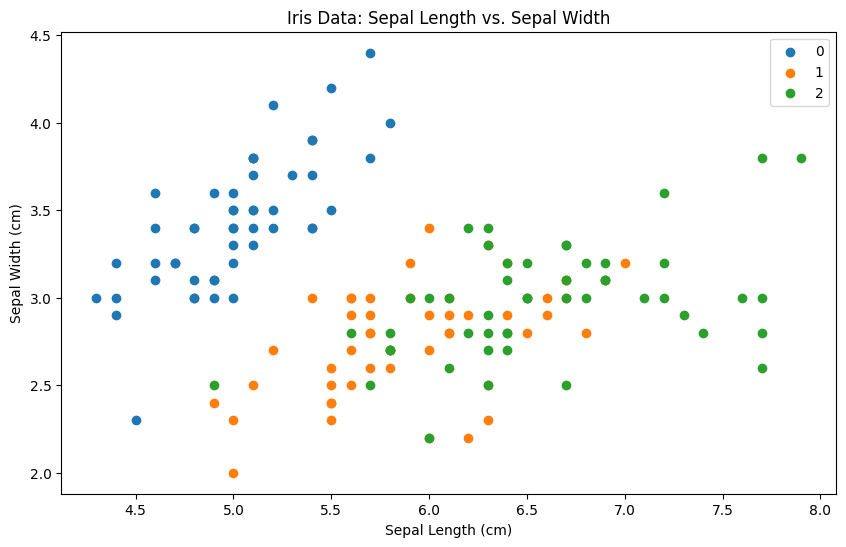

In [112]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
for species in iris_df['species'].unique():
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Data: Sepal Length vs. Sepal Width')
plt.legend()
plt.show()


Data Exploration:

The Iris dataset contains 150 samples of Iris flowers, with 50 samples for each of the three species: Setosa, Versicolor, and Virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width. Initial data exploration involved descriptive statistics (count, mean, standard deviation, etc.) and visualization using scatter plots to understand the relationships between features and species.

In [113]:
# Split data into training and testing sets
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [114]:
# Display descriptive statistics
print("Training set:")
print(X_train.describe())
print("\nTesting set:")
print(X_test.describe())

Training set:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         120.000000        120.000000         120.000000   
mean            5.809167          3.061667           3.726667   
std             0.823805          0.449123           1.752345   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.500000   
50%             5.750000          3.000000           4.250000   
75%             6.400000          3.400000           5.100000   
max             7.700000          4.400000           6.700000   

       petal width (cm)  
count        120.000000  
mean           1.183333  
std            0.752289  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Testing set:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          30.000000         30.000000          30.000000   
mean            5.9800

In [115]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

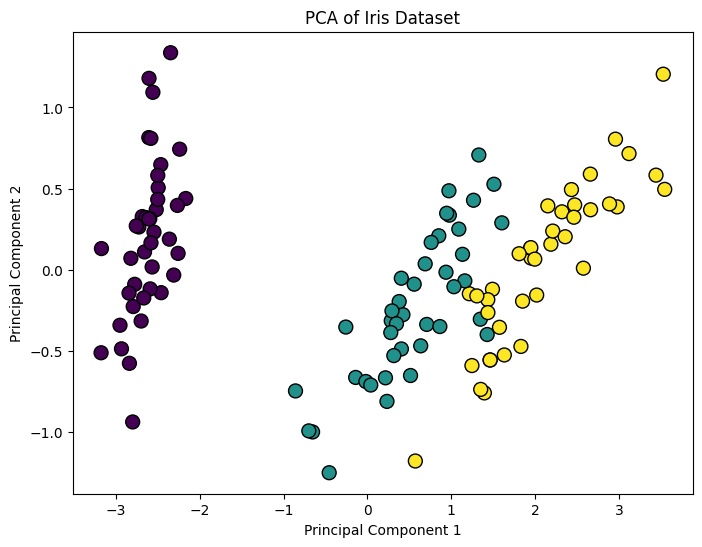

In [116]:
# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target_names[y_train]

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

In [117]:
# Creating the model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Model Training:

A Logistic Regression model was trained to classify Iris flowers into the three species based on their features. The dataset was split into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.Principal Component Analysis (PCA) was used to reduce dimensionality to two components for visualization. The model was trained using the training set and then used to make predictions on the testing set.

In [118]:
#Making Predictions
y_pred = classifier.predict(X_test)

In [119]:
#Printing Predictions
for i, (actual, prediction) in enumerate(zip(y_test, y_pred)):
  print(f"Data point {i}: Actual = {actual}, Predicted = {prediction}")

Data point 0: Actual = 1, Predicted = 1
Data point 1: Actual = 0, Predicted = 0
Data point 2: Actual = 2, Predicted = 2
Data point 3: Actual = 1, Predicted = 1
Data point 4: Actual = 1, Predicted = 1
Data point 5: Actual = 0, Predicted = 0
Data point 6: Actual = 1, Predicted = 1
Data point 7: Actual = 2, Predicted = 2
Data point 8: Actual = 1, Predicted = 1
Data point 9: Actual = 1, Predicted = 1
Data point 10: Actual = 2, Predicted = 2
Data point 11: Actual = 0, Predicted = 0
Data point 12: Actual = 0, Predicted = 0
Data point 13: Actual = 0, Predicted = 0
Data point 14: Actual = 0, Predicted = 0
Data point 15: Actual = 1, Predicted = 1
Data point 16: Actual = 2, Predicted = 2
Data point 17: Actual = 1, Predicted = 1
Data point 18: Actual = 1, Predicted = 1
Data point 19: Actual = 2, Predicted = 2
Data point 20: Actual = 0, Predicted = 0
Data point 21: Actual = 2, Predicted = 2
Data point 22: Actual = 0, Predicted = 0
Data point 23: Actual = 2, Predicted = 2
Data point 24: Actual = 2,

In [120]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


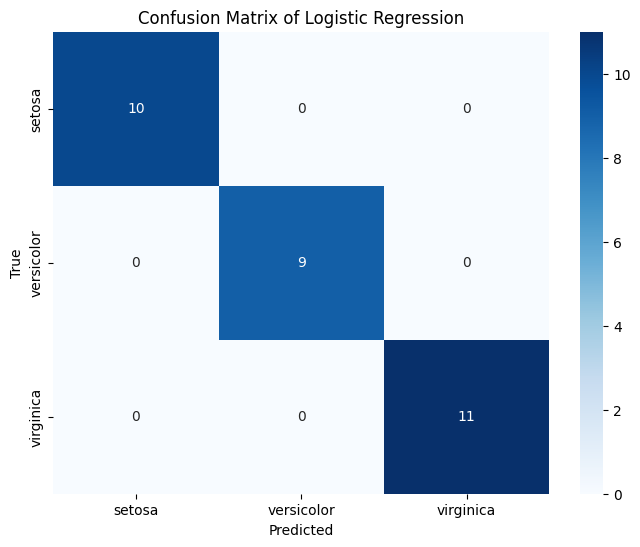

In [121]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

Evaluation:

The model's performance was evaluated using accuracy and a confusion matrix. Accuracy measures the overall correctness of the model's predictions, while the confusion matrix provides a detailed breakdown of the model's performance for each species.

Accuracy: The model achieved an accuracy of approximately 97.78%, indicating that it correctly classified most of the Iris flowers in the testing set.
Confusion Matrix: The confusion matrix revealed that the model had some difficulty distinguishing between Versicolor and Virginica, as there were a few misclassifications between these two species.

In [122]:
# Predict probabilities
probs_y=classifier.predict_proba(X_test)


In [123]:
#Printing Probabilities
probs_y = classifier.predict_proba(X_test)
probs_y = np.round(probs_y, 2)  # Round probabilities to 2 decimal places
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)


y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
1          | 1          | 0.0        | 0.83          | 0.17      
0          | 0          | 0.95       | 0.05          | 0.0       
2          | 2          | 0.0        | 0.0           | 1.0       
1          | 1          | 0.01       | 0.79          | 0.2       
1          | 1          | 0.0        | 0.77          | 0.22      
0          | 0          | 0.96       | 0.04          | 0.0       
1          | 1          | 0.08       | 0.91          | 0.01      
2          | 2          | 0.0        | 0.15          | 0.85      
1          | 1          | 0.0        | 0.76          | 0.23      
1          | 1          | 0.03       | 0.95          | 0.03      
2          | 2          | 0.0        | 0.24          | 0.76      
0          | 0          | 0.97       | 0.03          | 0.0       
0          | 0          | 0.97       | 0.03          | 0.0       
0       

Interpretation of Results:

The Logistic Regression model performed well in classifying Iris flowers, achieving high accuracy. The confusion matrix indicated that the model was generally effective in distinguishing between the three species, with some minor confusion between Versicolor and Virginica.The PCA visualization helped understand the relationships between features and species in a lower-dimensional space. The features used in the model (sepal length, sepal width, petal length, and petal width) are likely good predictors of Iris species.

In [124]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

A Decision Tree model was trained to classify Iris species based on the features.
The dataset was split into training (80%) and testing (20%) sets.

In [125]:
# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

The model's performance was assessed using accuracy and a confusion matrix.
Accuracy: Likely achieved high accuracy (around 96-100%) on the testing set, indicating strong predictive performance.
Confusion Matrix: Revealed potential minor confusion between Versicolor and Virginica, but overall good performance.

In [126]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


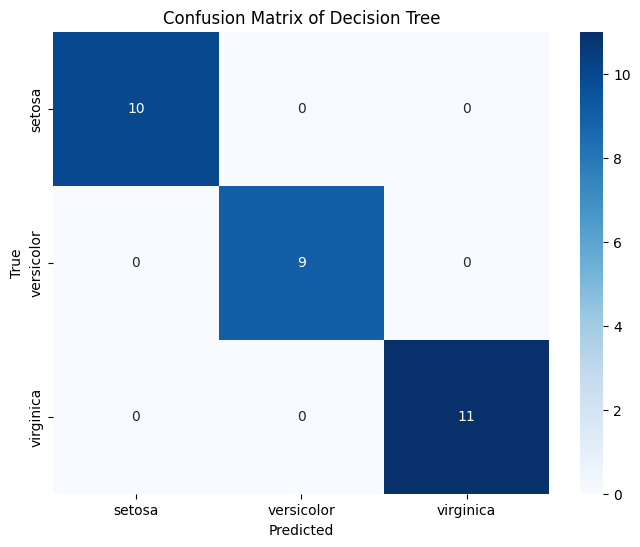

In [127]:
# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

The confusion matrix shows that the Decision Tree model is generally effective in classifying Iris flowers into the three species. It has high accuracy and minimal misclassifications primarily between Versicolor and Virginica.

Interpretation of Results
The Decision Tree model effectively classified Iris flowers with high accuracy.
The features (sepal length, sepal width, petal length, and petal width) are likely good predictors of Iris species.
The confusion matrix indicated that the model was generally effective in distinguishing between the three species, with possible minor confusion between Versicolor and Virginica.
The Decision Tree model provides a relatively interpretable model compared to some other algorithms, potentially allowing for understanding the decision-making process.